<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/5_2_%EC%A0%9C%ED%95%9C%EC%A1%B0%EA%B1%B4%EC%9D%B4_%EC%9E%88%EB%8A%94_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 기본 셋팅

In [1]:
import numpy as np

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (15,9)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


- 제한조건 : 연립방정식 or 연립부등식
1. 연립방정식 제한조건 : 라그랑주 승수법을 사용하여 새로운 최적화 문제를 풀어야 함
2. 연립부등식 제한조건 : KKT 조건이라는 것을 만족하도록 하는 복잡한 과정을 거쳐야 함

### 1) 등식 제한조건이 있는 최적화 문제

- 현실의 최적화 문제는 제한조건이 있는 최적화(constrained optimization 문제 多. 간단하게는 연립방정식 제한조건(=등식(equality) 제한조건)이 있는 경우
> $$ 
\begin{align}
x^{\ast} = \text{arg} \min_x f(x)
\end{align}
$$
<br>
> $$
\begin{align}
x \in \mathbf{R}^N  
\end{align}
$$
<br>
> $$ 
\begin{align}
g_j(x) = 0 \;\; (j=1, \ldots, M)  
\end{align}
$$


- 첫 번째 식만 보면 목적함수 $f(x)$를 가장 작게 하는 $N$차원 벡터 $x$값을 찾는 문제지만, 마지막 식에 있는 $M$개의 등식 제한 조건이 있으면 $M$개 연립 방정식을 찾는 문제
> → 연립방정식을 찾으면서 목적함수 $f(x)$를 가장 작게 하는 $x$값을 찾아야 함
<br>
> $$
\begin{align}
\begin{aligned}
g_1(x) &= 0 \\
g_2(x) &= 0 \\
&\vdots \\
g_M(x) &= 0 \\
\end{aligned}
\end{align}
$$


#### 예제

- 목적 함수 $f$와 등식 제한조건 $g$이 다음과 같은 경우를 생각하자.
> $$ 
\begin{align}
\text{목적함수 } 
f(x_1, x_2) = x_1^2 + x_2^2 
\end{align}
$$
<br>
> $$ 
\begin{align}
\text{제한조건 } 
g(x_1, x_2) = x_1 + x_2 - 1 = 0 
\end{align}
$$
<br>
> $g(x_1, x_2)=0$으로 정의되는 직선상에서 가장 $f(x_1, x_2)$값이 작아지는 점 $(x_1^{\ast}, x_2^{\ast})$를 찾는 문제

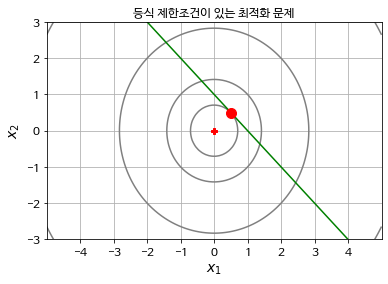

In [2]:
# 목적함수 f(x) = x1^2 + x2^2
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# 등식 제한조건 방정식 g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1

plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("등식 제한조건이 있는 최적화 문제")
plt.show()

### 2) 라그랑주 승수법

- 라그랑주 승수법(Lagrange multiplier) : 등식 제한조건이 있는 최적화 문제를 최적화하는 방법
> - 제한조건 등식에 $\lambda$라는 새로운 변수를 곱해서 더한 함수를 목적함수로 간주하여 최적화
> $$
\begin{align}
\begin{aligned}
h(x, \lambda) 
&= h(x_1, x_2, \ldots , x_N, \lambda_1, \ldots , \lambda_M) \\
&= f(x) + \sum_{j=1}^M \lambda_j g_j(x)
\end{aligned}
\end{align}
$$


- 확장된 목적함수 $h$는 입력변수가 더 늘어났기 때문에 그레디언트 벡터를 영벡터로 만드는 최적화 필요 조건이 $N+M$개가 됨
> $$ 
\begin{align}
\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= \dfrac{\partial f}{\partial x_1} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_1} = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= \dfrac{\partial f}{\partial x_2} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_2} = 0 \\
& \vdots  \\
\dfrac{\partial h}{\partial x_N} 
&= \dfrac{\partial f}{\partial x_N} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_N} = 0 \\
\dfrac{\partial h}{\partial \lambda_1} 
&= g_1 = 0 \\
& \vdots  \\
\dfrac{\partial h}{\partial \lambda_M} 
&= g_M = 0 
\end{aligned}
\end{align}
$$

- $N+M$개의 연립 방정식을 풀면 $N+M$개의 미지수를 구할 수 있고, 구한 결과에서 최소값을 찾을 수 있음
> $$ 
\begin{align}
x_1, x_2, \ldots, x_N, , \lambda_1, \ldots , \lambda_M
\end{align}
$$
<br>
> $$
\begin{align}
x_1, x_2, \cdots, x_N
\end{align}
$$


#### 예제

- 새로운 목적함수
> $$ 
\begin{align}
h(x_1, x_2, \lambda) 
= f(x_1, x_2) + \lambda g(x_1, x_2) 
= x_1^2 + x_2^2 + \lambda ( x_1 + x_2 - 1 ) 
\end{align}
$$

- 라그랑주 승수법을 적용하여 그레디언트 벡터가 영벡터인 위치를 구함
> $$ 
\begin{align}
\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= 2{x_1} + \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= 2{x_2} + \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&= x_1 + x_2 - 1 = 0 
\end{aligned}
\end{align}
$$

- 위 방정식을 풀면 해는 다음과 같음
> $$
\begin{align}
x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = -1
\end{align}
$$

#### 연습 문제 5.2.1

- 제한조건
> $$ 
\begin{align}
x_1 + x_2 = 1 
\end{align}
$$

- 목적 함수 최소화하는 $x_1$, $x_2$ 값을 라그랑주 승수법으로 계산해라
> $$ 
\begin{align}
f(x) = - \log{x_1} - \log{x_2} 
\end{align}
$$
><br>
> $$
\begin{align}
x_1, x_2 > 0 
\end{align}
$$

<br>

- 답
>  $$ 
\begin{align}
h(x_1, x_2, \lambda) 
= f(x_1, x_2) + \lambda g(x_1, x_2) 
= - \log{x_1} - \log{x_2}  + \lambda ( x_1 + x_2 - 1 ) 
\end{align}
$$
<br>
> $$ 
\begin{align}
\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= -\dfrac{1}{x_1}+ \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= -\dfrac{1}{x_2}+ \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&= x_1 + x_2 - 1 = 0 
\end{aligned}
\end{align}
$$
<br>
> $$
\begin{align}
x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = 2
\end{align}
$$

#### 연습 문제 5.2.2

- 제한조건
> $$ 
\begin{align}
x_1^2 + x_2^2 = 1 
\end{align}
$$

- 목적함수
> $$ 
\begin{align}
f(x) = x_1 + x_2  
\end{align}
$$

를 최소화하는 $x_1$, $x_2$ 값을 라그랑주 승수법으로 계산하라. 

- 답
>  $$ 
\begin{align}
h(x_1, x_2, \lambda) 
= f(x_1, x_2) + \lambda g(x_1, x_2) 
= x_1 + x_2   + \lambda ( x_1^2 + x_2^2 -1 ) 
\end{align}
$$
<br>
> $$ 
\begin{align}
\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= 2x_1 \lambda + 1 = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= 2x_2 \lambda + 1  = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&= x_1^2 + x_2^2 -1 = 0 
\end{aligned}
\end{align}
$$
<br>
> $$
\begin{align}
x_1 = x_2 = -\dfrac{\sqrt{2}}{2}, \;\;\; \lambda = \dfrac{1}{\sqrt{2}}
\end{align}
$$

### 3) 사이파이를 사용하여 등식 제한조건이 있는 최적화 문제 계산하기

사이파이의 optimize 서브패키지는 제한조건이 있는 최적화 문제를 푸는 `fmin_slsqp()` 명령을 제공한다.

```
fmin_slsqp(func_objective, x0, eqcons=[func_constraint1, func_constraint2])
```

`fmin_slsqp()` 명령은 목적함수와 초깃값, 그리고 제한조건 함수의 리스트를 인수로 받는다. 목적함수는 배열인 인수를 받도록 구현되어야 하고 제한조건 함수의 경우에는 항상 `eqcons` 인수를 명시해야 한다.

#### 예제

다음은 위 예제를 `fmin_slsqp()` 명령으로 푸는 코드다.

In [3]:
import scipy as sp

def f1array(x):
    return x[0] ** 2 + x[1] ** 2

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(f1array, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([0.5, 0.5])

### 4) 라그랑주 승수의 의미

- 만약 최적화 문제에서 등식 제한조건 $g_i$이 있는가 없는가에 따라 해의 값이 달라진다면 이 등식 제한조건에 대응하는 라그랑주 승수 $\lambda_i$는 0이 아닌 값이어야 함
> $$ 
\begin{align}
\lambda_i \neq 0 
\end{align}
$$

- $\lambda_i = 0$일 때만 원래의 문제와 제한조건이 있는 문제의 최적화 조건이 같아지므로 최적화 해의 위치도 같게 나오기 때문

#### 예제

- 목적함수
> $$ 
\begin{align}
f(x) = x_1^2 + x_2^2
\end{align}
$$

- 최소화 문제의 답
> $$ 
\begin{align}
x_1 = x_2 = 0
\end{align}
$$

-  제한조건
> $$ 
\begin{align}
g(x_1, x_2) = x_1 + x_2 = 0
\end{align}
$$

- 라그랑주 승수법에서 새로운 목적함수
> $$
\begin{align}
h(x_1, x_2, \lambda) 
= f(x_1, x_2) + \lambda g(x_1, x_2) 
= x_1^2 + x_2^2 + \lambda ( x_1 + x_2) 
\end{align}
$$

- 최적화 조건은
> $$ 
\begin{align}
\begin{aligned}
\dfrac{\partial h}{\partial x_1} 
&= 2{x_1} + \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&= 2{x_2} + \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&= x_1 + x_2 = 0 
\end{aligned}
\end{align}
$$

- 해: 제한조건이 있으나 없으나 해는 같고 라그랑주 승수가 0
> $$ 
\begin{align}
x_1 = x_2 = \lambda = 0
\end{align}
$$


### 5) 부등식 제한조건이 있는 최적화 문제

- 부등식(inequality) 제한조건이 있는 최적화 문제
> $$ 
\begin{align}
x^{\ast} = \text{arg} \min_x f(x) 
\end{align}
$$
<br>
> $$
\begin{align}
x \in \mathbf{R}^N  
\end{align}
$$
<br>
> $$
\begin{align}
g_j(x) \leq 0 \;\; (j=1, \ldots, M)  
\end{align}
$$

- if 부등식이 아래와 같다면,  양변에 -1을 곱하여 부등호의 방향을 바꿈

$$
\begin{align}
g_j(x) \geq 0
\end{align}
$$

$$
\begin{align}
h(x, \lambda) = f(x) + \sum_{j=1}^M \lambda_j g_j(x)
\end{align}
$$

- KKT(Karush-Kuhn-Tucker) 조건

1. 모든 독립 변수 $x_1, x_2, \ldots , x_N$에 대한 미분값이 0이다.
> $$  
\begin{align}
\dfrac{\partial h(x, \lambda)}{\partial x_i} = 0 
\end{align}
$$
>→ 라그랑주 승수 $\lambda$에 대한 미분은 0이 아니어도 된다.

2. 모든 라그랑주 승수 $\lambda_1, \ldots , \lambda_M$과 제한조건 부등식($\lambda$에 대한 미분값)의 곱이 0이다.
> $$  
\begin{align}
\lambda_j \cdot \dfrac{\partial h(x, \lambda)}{\partial \lambda_j} = \lambda_j \cdot g_j = 0 
\end{align}
$$
>→ 라그랑주 승수 $\lambda$ 값 자체가 0이 되어도 된다.

3. 라그랑주 승수는 음수가 아니어야 한다.
> $$ 
\begin{align}
\lambda_j \geq 0 
\end{align}
$$
> → KKT 조건이 실제로 부등식 제한조건이 있는 최적화 문제와 같은 문제임을 보장하는 조건이다. 

#### 예제

부등식 제한조건을 가지는 최적화의 예를 풀어보자. 

- 목적 함수
> $$ 
\begin{align}
f(x_1, x_2) = x_1^2 + x_2^2 
\end{align}
$$


- 두가지 제한 조건
> $$ 
\begin{align}
g(x_1, x_2) = x_1 + x_2 - 1 \leq 0 
\end{align}
$$
> $$ 
\begin{align}
g(x_1, x_2) = -x_1 - x_2 + 1 \leq 0 
\end{align}
$$


1. 첫 번째 제한조건의 경우에는 부등식 제한조건이 있기는 하지만 원래의 최적화 문제의 해가 부등식 제한조건이 제시하는 영역 안에 있기 때문에 최적점의 위치가 달라지지 않는다. 
2. 두 번째 제한조건의 경우에는  원래의 최적화 문제의 해가 부등식 제한조건이 제시하는 영역 바깥에 있기 때문에 최적점의 위치가 달라졌다. 하지만 최적점의 위치가 영역의 경계선(boundary line)에 있다는 점에 주의하라.

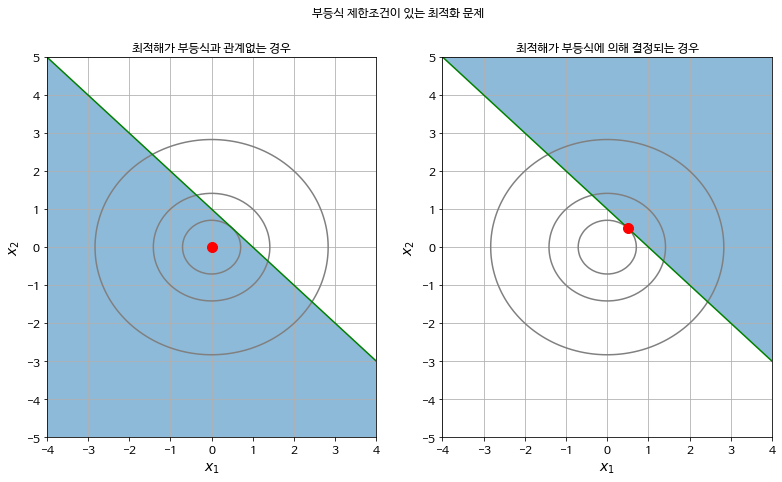

In [4]:
plt.figure(figsize=(13, 7))
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식과 관계없는 경우")
ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlabel("x_1")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식에 의해 결정되는 경우")
plt.suptitle("부등식 제한조건이 있는 최적화 문제")
plt.show()

- 부등식 제한조건이 있는 최적화 문제를 풀면 그 제한조건은 다음 두 가지 경우 중 하나가 됨

1. 최적화 결과에 전혀 영향을 주지 않는 → 쓸모없는 제한조건
2. 최적화 결과에 영향을 주는 → 등식(equality)인 제한조건


- KKT조건 중 두 번째 조건이 뜻하는 바 : $x^{\ast}, \lambda^{\ast}$는 KKT 조건을 풀어서 구한 최적해의 값이다. 
> $$ 
\begin{align}
\lambda^{\ast} = 0 \;\; \text{or} \;\;  g(x^{\ast}) = 0 
\end{align}
$$

- if $g_i = 0$, 부등식 제한조건이 아닌 등식 제한조건이 됨. → 등식 제한조건에서 는 라그랑주 승수는 0이 아닌 값을 가짐 
> $$ 
\begin{align}
g_i = 0 \;\; \rightarrow \;\; \lambda_i \neq 0 \; (\lambda_i > 0)
\end{align}
$$

- if  $g_i \neq 0 \; (g_i < 0)$, 해가 $g_i$가 표현하는 곡선으로부터 떨어져 있기 때문에 부등식 제한조건이 아무런 의미 X. 제한조건이 있을 때 해 = 없을 때의 해
→ 목적함수 $h(x, \lambda)$는  $\lambda_ig_i (g_i \neq 0)$ 항이 있으나 없으나 상관없이 같은 해를 가짐. 따라서 $\lambda_i=0$
> $$ 
\begin{align}
g_i \neq 0 \;\; \rightarrow \;\; \lambda_i = 0  
\end{align}
$$

- 결론 : 부등식 제한조건이 있는 최적화 문제는 각 제한조건에 대해 위의 두 가지 경우를 가정하여 각각 풀어보면서 최적의 답을 찾는다.

#### 예제

다음은 복수의 부등식 제한조건이 있는 또다른 2차원 최적화 문제의 예다.

$$
\begin{align}
\text{arg} \min_x \; (x_1-4)^2 + (x_2-2)^2
\tag{5.2.40}
\end{align}
$$

$$
\begin{align}
g_1(x) = x_1 + x_2 - 1\leq 0
\tag{5.2.41}
\end{align}
$$

$$
\begin{align}
g_2(x) = -x_1 + x_2 - 1\leq 0
\tag{5.2.42}
\end{align}
$$

$$
\begin{align}
g_3(x) = -x_1 - x_2 - 1\leq 0
\tag{5.2.43}
\end{align}
$$

$$
\begin{align}
g_4(x) = x_1 - x_2 - 1\leq 0
\tag{5.2.44}
\end{align}
$$

이 4개의 제한조건은 다음과 같은 하나의 부등식으로 나타낼 수도 있다.

$$ 
\begin{align}
g(x) 
= \left\vert\, x_1 \right\vert + \left\vert\, x_2 \right\vert - 1 
= \sum_{i=1}^{2} \left\vert\, x_i \right\vert - 1 \leq 0 
\tag{5.2.45}
\end{align}
$$

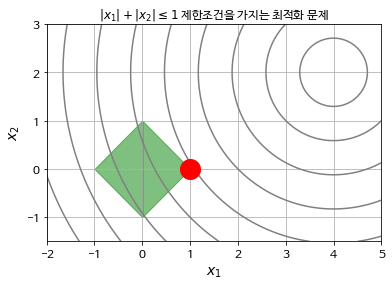

In [5]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)


x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

# 제한 조건의 상수
k = 1
ax = plt.gca()
x12 = np.linspace(-k, 0, 10)
x13 = np.linspace(0, k, 10)
ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

# 최적점 위치
x1_sol = 1
x2_sol = 0
plt.plot(x1_sol, x2_sol, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
plt.show()

#### 연습 문제 5.2.3

위 예제에서 최적해가 

$$
\begin{align}
x_1 = 1, \; x_2 = 0
\tag{5.2.46}
\end{align}
$$

이라는 사실을 이용하여 
라그랑주 승수 $\lambda_1$, $\lambda_2$, $\lambda_3$, $\lambda_4$ 중 어느 값이 0이 되는지 알아내라.

### 6) 사이파이를 사용하여 부등식 제한조건이 있는 최적화 문제 계산하기

`fmin_slsqp()` 명령은 이렇게 부등식 제한조건이 있는 경우에도 사용할 수 있다. 제한조건 인수의 이름이 `ieqcons`로 달라졌다.
 
```
fmin_slsqp(func_objective, x0, ieqcons=[func_constraint1, func_constraint2])
```

단 `ieqcons` 인수에 들어가는 부등호의 부호는 우리가 지금까지 사용한 방식과 달리 0 또는 양수이어야 한다. 

$$ 
\begin{align}
g \geq 0
\end{align}
$$

사실 `fmin_slsqp()` 명령은 등식 제한조건과 부등식 제한조건을 동시에 사용할 수 있다.

In [6]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.6055512804550336
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([9.99999982e-01, 1.79954011e-08])

#### 연습 문제 5.2.4

위 문제에서 제한조건을 다음과 같이 바꾼다.

$$ 
\begin{align}
g(x) 
= \left\vert\, x_1 \right\vert + \left\vert\, x_2 \right\vert - k 
= \sum_{i=1}^{2} \left\vert\, x_i \right\vert - k \leq 0 
\end{align}
$$

여기에서 $k$의 값을 0.1부터 10까지 다양하게 변화시키면서 최적화의 해가 어떻게 달라지는지 살펴보라.

In [15]:
from functools import partial

def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)

def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

def ieq_constraint2(x, k):
    return np.atleast_1d(k - np.sum(np.abs(x)))

def plot_opt(k):
  x1 = np.linspace(-2, 5, 100)
  x2 = np.linspace(-1.5, 3, 100)
  X1, X2 = np.meshgrid(x1, x2)
  Y = f2plt(X1, X2)

  plt.contour(X1, X2, Y, colors="gray",
              levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

  ax = plt.gca()
  x12 = np.linspace(-k, 0, 10)
  x13 = np.linspace(0, k, 10)
  ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
  ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

  # 최적점 위치
  x_sol = sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[partial(ieq_constraint2, k=k)], iprint=0)
  plt.plot(x_sol[0], x_sol[1], 'ro', ms=20)

  plt.xlim(-2, 5)
  plt.ylim(-1.5, 3)
  plt.xticks(np.linspace(-2, 5, 8))
  plt.yticks(np.linspace(-1, 3, 5))
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
  plt.show()

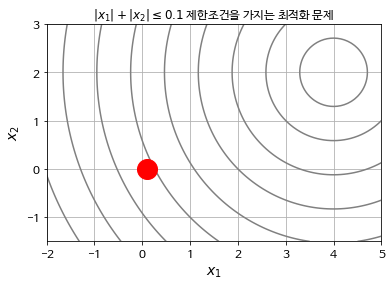

In [19]:
plot_opt(0.1)

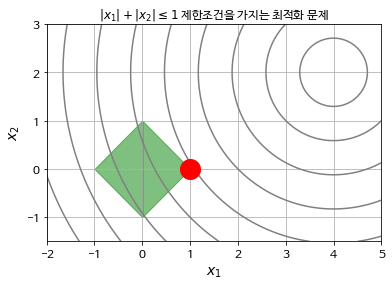

In [16]:
plot_opt(1)

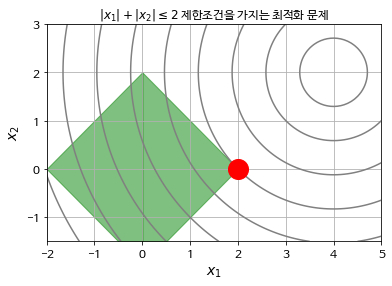

In [17]:
plot_opt(2)